In [16]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as ski
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Random Forest

In [17]:
#Random Forest Regressor
max_depth=[5,10,20]
n_estimators=[500,700,1000]
N=len(max_depth)*len(n_estimators)

x_tr, y_tr, x_te, y_te = load_split_data(0.8)

#Array to store the end-systolic predictions for each combination of hyperparameters 
esE=np.zeros((len(x_te),N))


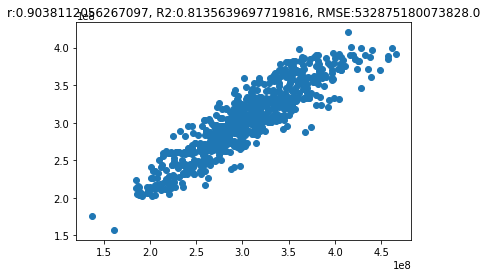

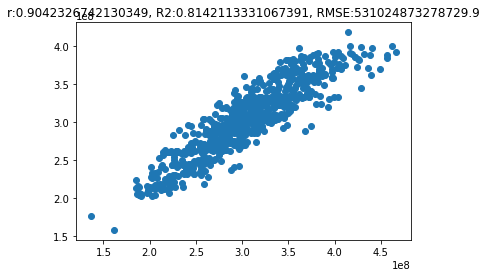

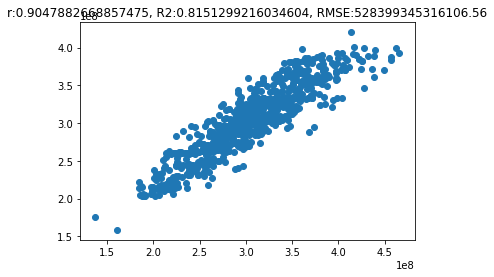

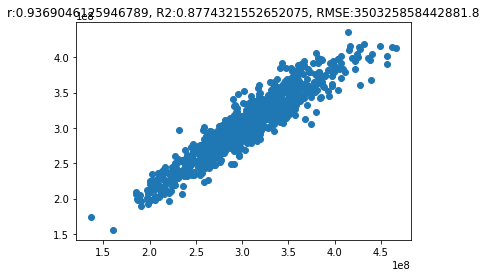

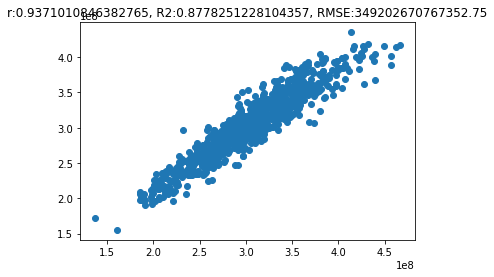

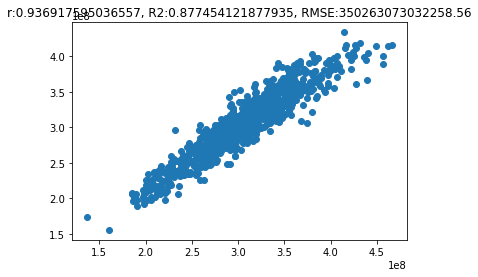

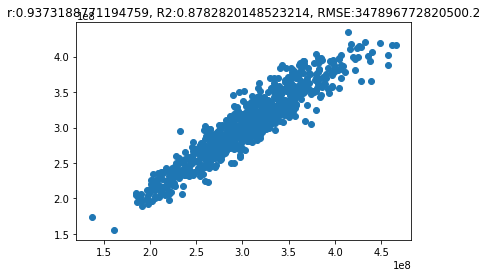

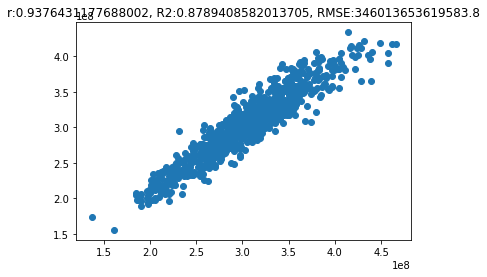

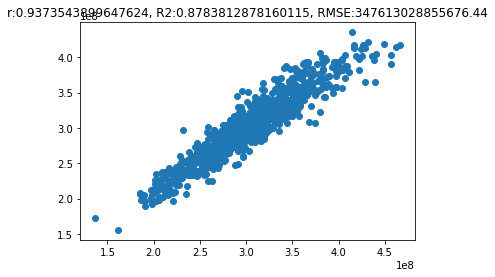

In [18]:
i=0
r = np.zeros(N)
R2 = np.zeros(N)
RMSE = np.zeros(N)


for m in enumerate (max_depth):
    for n in enumerate (n_estimators):
        regressor=RandomForestRegressor(n[1],max_depth=m[1])
        regressor.fit(x_tr,y_tr)
        y_predict=regressor.predict(x_te)
        esE[:,i]=y_predict
        R2[i] = regressor.score(x_te,y_te)
        r = np.corrcoef(y_te, y_predict)[0,1]
        RMSE[i] = sklearn.metrics.mean_squared_error(y_te, y_predict)
        plt.figure()
        plt.scatter(y_te, y_predict)
        plt.title('r:{}, R2:{}, RMSE:{}'.format(r,R2[i],RMSE[i]))
        i+=1
plt.show()

# Support Vector Regressor

In [30]:
#Support Vector Regressor
C=[1,10,100]
gamma=[0.001,0.01,0.1,1]

from sklearn.svm import SVR

pred_data = pd.read_csv("Data/true_ees.csv")
y = pred_data.to_numpy()[:,1]

data = pd.read_csv("Data/u2.csv")
X = data.to_numpy()

x_tr, y_tr, x_te, y_te = split_data(X, y, 0.8, seed=1)


regressor = SVR(kernel = 'linear', C=10, gamma=0.001)
regressor.fit(x_tr,y_tr)

y_pred = regressor.predict(x_te)
r = np.corrcoef(y_te, y_pred)[0,1]


In [31]:
print(r)

0.3085592573198128


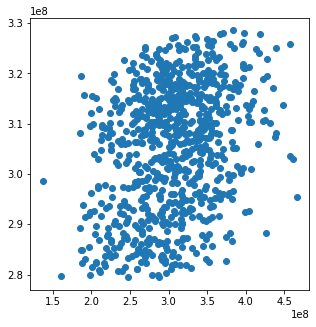

In [32]:
plt.close('all')
plt.figure(figsize=(5,5))
plt.scatter(y_te,y_pred)
plt.show()

# Ridge Regression

In [38]:
#Ridge Regression
#alpha=[1,10,100,200] from paper
alpha=[0.001,0.01, 0.1]


from sklearn.linear_model import Ridge
import sklearn.metrics

pred_data = pd.read_csv("Data/true_ees.csv")
y = pred_data.to_numpy()[:,1]

data = pd.read_csv("Data/u2.csv")
X = data.to_numpy()

x_tr, y_tr, x_te, y_te = split_data(X, y, 0.8, seed=1)

R2 = np.zeros(len(alpha))
r = np.zeros(len(alpha))

for i, a in enumerate(alpha):
    rid = Ridge(alpha=a)
    rid.fit(x_tr,y_tr)
    y_pred = rid.predict(x_te)
    R2[i] = rid.score(x_tr,y_tr)
    r[i]= np.corrcoef(y_te, y_pred)[0,1]
    print('alpha={}, R_squared={}, correlation_r={}'.format(a, R2[i], r[i]))
    
j1 = np.argmax(best_R2)
j2 = np.argmax(best_r)
if j1 == j1:
    print('Best parameters: alpha={}, R_squared={}, correlation_r={}'.format(alpha[j1], R2[j1], r[j1]))
else:
    print('Problem...')

    
print('RMSE = ', sklearn.metrics.mean_squared_error(y_te, y_pred))

alpha=0.001, R_squared=0.8215410507372629, correlation_r=0.8984382872173202
alpha=0.01, R_squared=0.8215410507314319, correlation_r=0.8984382287092694
alpha=0.1, R_squared=0.8215410501486184, correlation_r=0.8984376434642057
Best parameters: alpha=0.001, R_squared=0.8215410507372629, correlation_r=0.8984382872173202
RMSE =  551480660219412.6


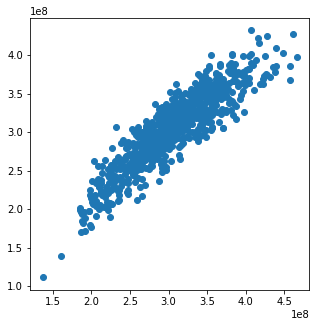

In [36]:
plt.close('all')
plt.figure(figsize=(5,5))
plt.scatter(y_te,y_pred)
plt.show()

# Gradient Boosting

In [11]:
#Gradient Boosting
learning_rate=[0.01,0.05,1]
n_estimators=[100,500,1000,1750]